In [5]:
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd

In [6]:
raw_dir = Path('artifacts/raw')
train_ds = (
    pd.read_csv(raw_dir / 'train.csv')
    .sort_values(by=["time", "row", "col"])
    .reset_index(drop=True)
    )


In [61]:
train_ds.head()

,time,row,col,demand
0,0,0,0,0
1,0,0,1,0
2,0,0,2,5
3,0,0,7,33
4,0,1,3,19


In [62]:
train_ds = train_ds.assign(
    hour_of_day = train_ds['time'] % 24, day = train_ds['time']//24
)
train_ds.head()

,time,row,col,demand,hour_of_day,day
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,2,5,0,0
3,0,0,7,33,0,0
4,0,1,3,19,0,0


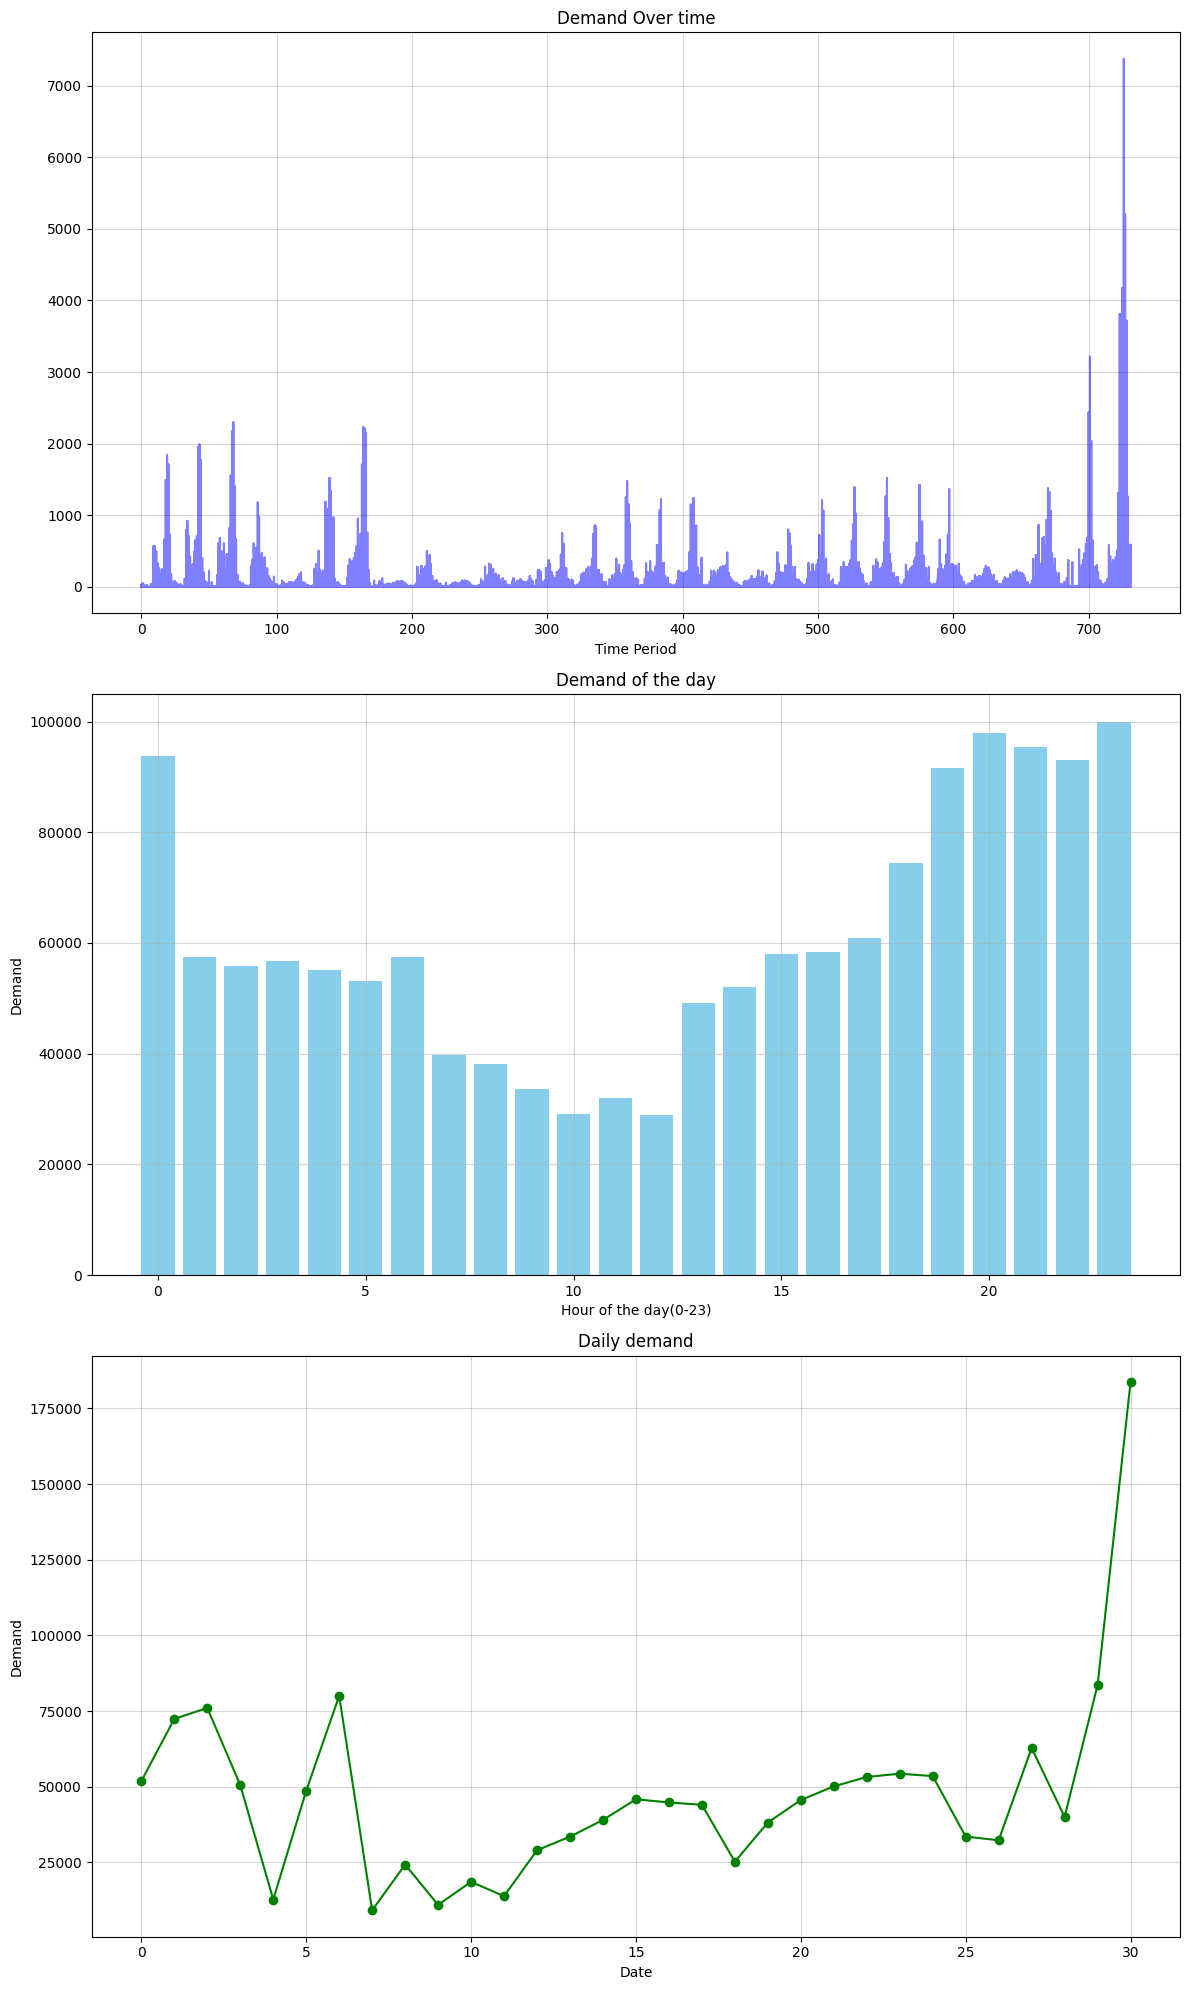

In [63]:
fix, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 20))

ax1.plot(train_ds['time'], train_ds['demand'], 'b-', alpha=0.5)
ax1.set_title('Demand Over time')
ax1.set_xlabel('Time Period')
ax2.set_ylabel('Demand')
ax1.grid(True, alpha=0.5)


hourly_demand = train_ds.groupby('hour_of_day')['demand'].sum()
ax2.bar(hourly_demand.index, hourly_demand.values, color='skyblue')
ax2.set_title('Demand of the day')
ax2.set_xlabel('Hour of the day(0-23)')
ax2.set_ylabel('Demand')
ax2.grid(True, alpha=0.5)

daily_demand = train_ds.groupby('day')['demand'].sum()
ax3.plot(daily_demand.index, daily_demand.values, 'g-', marker='o')
ax3.set_title('Daily demand')
ax3.set_xlabel('Date') 
ax3.set_ylabel('Demand')
ax3.grid(True, alpha=0.5)

plt.tight_layout()

best shit is 18


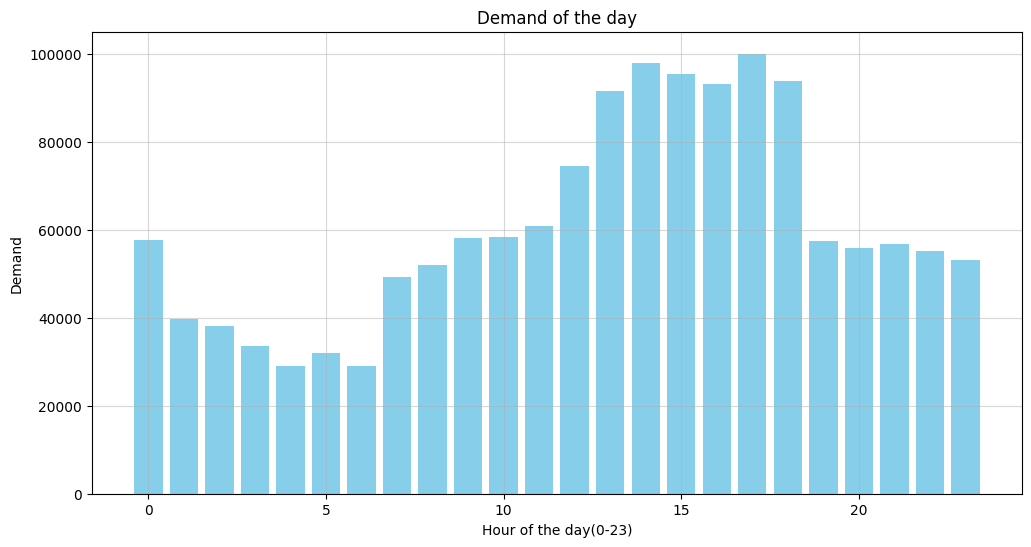

In [ ]:
shifts= range(24)
best_sift = 0
max_variance = float('-inf')

train_ds_sorted = train_ds.sort_values('time').reset_index(drop=True)

for shift in shifts:
    df_temp = train_ds_sorted.copy()

    df_temp['hour_of_day'] = (df_temp['time'] + shift) % 24
    peak_demand = df_temp[df_temp['hour_of_day'].isin([17, 18])]['demand'].sum()
    off_peak_demand = df_temp[df_temp['hour_of_day'].isin([3, 4])]['demand'].sum()
    variance = peak_demand - off_peak_demand
    if variance > max_variance:
        max_variance = variance
        best_sift = shift


train_ds_sorted['hour_of_day'] = (train_ds_sorted['time'] + best_sift) % 24
train_ds_sorted['day'] = (train_ds_sorted['time'] + best_sift) // 24
print(f'best shit is {best_sift}')


hourly_demand = train_ds_sorted.groupby('hour_of_day')['demand'].sum()
plt.figure(figsize=(12,6))
plt.bar(hourly_demand.index, hourly_demand.values, color='skyblue')
plt.title('Demand of the day (after shift)')
plt.xlabel('Hour of the day(0-23)')
plt.ylabel('Demand')
plt.grid(True, alpha=0.5)



In [ ]:
df = pd.read_parquet(raw_dir / "fhv_tripdata.parquet")
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.dropna(subset=['PUlocationID'], inplace=True)
df['PUlocationID'] = df['PUlocationID'].astype(int)
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['is_weekend'] = df['pickup_weekday'].isin([5, 6]).astype(int)
df = df.groupby(['pickup_day', 'pickup_hour', 'pickup_weekday', 'is_weekend', 'PUlocationID']).size().reset_index(name='trip_count')

In [120]:
df

,pickup_hour,pickup_day,pickup_weekday,is_weekend,PUlocationID,trip_count
0,0,1,2,0,3,2
1,0,1,2,0,4,1
2,0,1,2,0,5,2
3,0,1,2,0,6,2
4,0,1,2,0,7,5
...,...,...,...,...,...,...
102461,23,31,4,0,258,2
102462,23,31,4,0,260,1
102463,23,31,4,0,262,1
102464,23,31,4,0,263,1


In [117]:
import random

KeyError: 31781

In [57]:
df.shape

(1898108, 8)

In [27]:
df1.drop_duplicates(inplace=True)
df1.shape

/var/folders/3q/v2wvh8s50vd7174w_pvkncqh0000gn/T/ipykernel_23373/1445003006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


(1894239, 5)